In [1]:
#Import Dependencies
import json
import pandas as pd
import numpy as np
import re

In [2]:
# Name the file path to the JSON File in the Resources folder
file_dir = "Resources/wikipedia-movies.json"
# To open a file in a directory, use an f string: f'{file_dir}filename'

In [3]:
# Open and read the json file
with open(f'{file_dir}', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
# Count the list of dictionaries
len(wiki_movies_raw)

7311

In [5]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [6]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [8]:
# Read in the CSV files from kaggle.com
kaggle_metadata = pd.read_csv('Resources/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('Resources/ratings.csv')

In [9]:
# Understanding the above movie dataframes
    # .sample(n=#) is used to pull random rows in the dataset to inspect the middle of the data

#kaggle_metadata.head()
#kaggle_metadata.tail()
#kaggle_metadata.sample(n=5)

#ratings.head()
#ratings.tail()
ratings.sample(n=5)

,userId,movieId,rating,timestamp
5082498,52297,1907,2.5,1230425660
15280987,159063,382,3.0,851696627
2332130,24190,92422,2.5,1460577645
21849924,227006,25826,4.5,1438731920
4124803,42900,1252,4.0,1112417570


In [10]:
# Create dataframe from the wikipedia movies data
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# # Inspect all of the column names
# wiki_movies_df.columns.tolist()


# # Create a list comprehension with a filter
# wiki_movies = [movie for movie in wiki_movies_raw
#                if ('Director' in movie or 'Directed by' in movie)
#                    and 'imdb_link' in movie]
# len(wiki_movies)


# # Create a dataframe from the wiki_movies list
# movies_df = pd.DataFrame(wiki_movies)
# movies_df.sample(n=10)
# movies_df.columns.tolist()
# len(movies_df.columns)

#Above is commented out due to finding another column to filter out:

#  Filter the data on director, directed by, and take out no. of episodes rows. 
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]

In [12]:
# Create a dataframe from the list
wiki_movies_df = pd.DataFrame(wiki_movies)

# Inspect the new dataframe columns
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Also known as',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Screen story by',
 'Hangul',
 'Revised Romanization

In [13]:
# Column length of wiki_movies_df
len(wiki_movies_df.columns)

75

In [14]:
# Create a function to clean the dataframe
def clean_movie(movie):
    
    # Copy the movies and add them to dictionaries, to avoid destroying good data and to create a non-destructive copy
    movie = dict(movie)
    
    # Return the movie variable
    return movie

In [15]:
# Look for movies in a different language 
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [16]:
# Return the url of the 'Arabic' movies
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6834    https://en.wikipedia.org/wiki/The_Insult_(film)
7058     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [17]:
# Inspect the column names in alphabetical order
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [18]:
# Add the alternative titles dict to the movie object
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
        
    # Consolidate columns with the same names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
     # List of all columns to combine:
        change_column_name('Adaptation by', 'Writer(s)')
        change_column_name('Country of origin', 'Country')
        change_column_name('Directed by', 'Director')
        change_column_name('Distributed by', 'Distributor')
        change_column_name('Edited by', 'Editor(s)')
        change_column_name('Length', 'Running time')
        change_column_name('Original release', 'Release date')
        change_column_name('Music by', 'Composer(s)')
        change_column_name('Produced by', 'Producer(s)')
        change_column_name('Producer', 'Producer(s)')
        change_column_name('Productioncompanies ', 'Production company(s)')
        change_column_name('Productioncompany ', 'Production company(s)')
        change_column_name('Released', 'Release Date')
        change_column_name('Release Date', 'Release date')
        change_column_name('Screen story by', 'Writer(s)')
        change_column_name('Screenplay by', 'Writer(s)')
        change_column_name('Story by', 'Writer(s)')
        change_column_name('Theme music composer', 'Composer(s)')
        change_column_name('Written by', 'Writer(s)')
        
    return movie

In [19]:
# Make a list of cleaned movies
clean_movie = [clean_movie(movie) for movie in wiki_movies]

In [20]:
# Create a dataframe from the cleaned movies list
wiki_movies_df = pd.DataFrame(clean_movie)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [21]:
# Length of wiki_movies
len(wiki_movies_df.columns.tolist())

56

In [22]:
# Delete duplicate rows based on duplicate IMBd IDs 
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Recorded,Venue,Length,Label,Director,Producer,Animation by,Color process,Screen story by,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [23]:
# Count null values for each column in a list comprehension:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Directed by', 2],
 ['Produced by', 360],
 ['Screenplay by', 4726],
 ['Story by', 6037],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Music by', 593],
 ['Cinematography', 691],
 ['Edited by', 694],
 ['Productioncompany ', 2532],
 ['Distributed by', 495],
 ['Release date', 193],
 ['Running time', 141],
 ['Country', 388],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Written by', 2490],
 ['Genre', 6923],
 ['Theme music composer', 6966],
 ['Country of origin', 6881],
 ['Original language(s)', 6875],
 ['Producer(s)', 6877],
 ['Editor(s)', 6887],
 ['Production company(s)', 6902],
 ['Original network', 6908],
 ['Original release', 6874],
 ['Productioncompanies ', 6310],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Distributor', 6895],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Composer(s)', 7025],
 ['Crea

In [24]:
# Remove null rows
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Distributed by,Release date,Running time,Country,Language,Budget,Box office,Written by,Productioncompanies,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,20th Century Fox,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,English,$20 million,$21.4 million,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,English,$6 million,$2.7 million,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,TriStar Pictures,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,"[English, Lao]",$35 million,"$57,718,089",NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,Orion Pictures,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,English,$12 million,"$7,331,647",Woody Allen,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,Paramount Pictures,"December 19, 1990",95 minutes,US,English,$25 million,"$6,939,946 (USA)",Paul Hogan,NaN,tt0099018


In [25]:
# Use regex functions to change column data types:

# drop null values in the box_office column
box_office = wiki_movies_df['Box office'].dropna()
len(box_office)

5485

In [26]:
# Check if all data in the box_office column is a string
def is_not_a_string(x):
    return type(x) != str
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [27]:
# Use lambda f(x)s to join functions when data points are lists
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

# Fix box_office data points that include ranges
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [28]:
# Find data in the box_office column that matches the form: 33,333,444 (mb)illion
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3909

In [29]:
# Find data in the box_office column that matches the form: $123,456,789
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1559

In [30]:
# Check to see if data matches both form one and form two
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

# this will throw an error!
#box_office[(not matches_form_one) and (not matches_form_two)]

# fix the above error code with the addition of element-wise logical operators (~, &, or |)
box_office[~matches_form_one & ~matches_form_two]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [31]:
# Extract and convert the box_office values identified above using form_one and form_two
box_office.str.extract(f'({form_one}|{form_two})')

# Turn extracted values into numeric values
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [32]:
# Extract values from box_office then display the results
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [33]:
# Drop the box_office column
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [34]:
# Process the budget data
budget = wiki_movies_df['Budget'].dropna()

# Convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

# Remove dollar signs and hyphens
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [35]:
# Compare data to form_one/two created above
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [36]:
# remove citation references
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

C:\Users\16are\AppData\Local\Temp\ipykernel_12164\3494872561.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  budget = budget.str.replace(r'\[\d+\]\s*', '')


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [37]:
# Parse the budget values
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [38]:
# Drop original budget column
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [39]:
# Drop nulls in the release date column
release_date = wiki_movies_df['Release date'].dropna()

# Convert any lists to str
release_date = release_date.map(lambda x: ' '.join(x) if type(x) == list else x)

# parse the release data column
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'


In [40]:
# extract all of the release date data
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [41]:
# use the to_datetime() f(x) in Pandas to target the above dates
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [42]:
# Parse running time
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [43]:
# Count the number of str in the release_date column
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [44]:
# Analyze the rest of the rows not identified above
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 364, dtype: object

In [45]:
# Count the number of strings with different abbreviations of minutes
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6876

In [46]:
# Look at the remaining rows
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running time, dtype: object

In [47]:
# Account for more of the data
running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE, na=False) != True]

1551     varies
3925    4 hours
Name: Running time, dtype: object

In [48]:
# Extract more of the data
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
running_time_extract.sample(n=10)

,0,1,2
6033,NaN,NaN,112
6749,NaN,NaN,121
6802,NaN,NaN,119
5089,NaN,NaN,90
3991,NaN,NaN,97
6667,NaN,NaN,137
3024,NaN,NaN,117
4065,NaN,NaN,110
3005,NaN,NaN,114
1857,NaN,NaN,96


In [49]:
# Change NaN to zero
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [50]:
# Convert hour minute data to minutes
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [51]:
# Drop Running time from the dataset
wiki_movies_df.drop('Running time', axis=1, inplace=True)
wiki_movies_df.sample(n=10)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Release date,Country,Language,Written by,Productioncompanies,imdb_id,box_office,budget,release_date,running_time
2480,https://en.wikipedia.org/wiki/A_Map_of_the_Wor...,1999,https://www.imdb.com/title/tt0160513/,A Map of the World,Scott Elliott,"[Kathleen Kennedy, Frank Marshall]","[Peter Hedges, Polly Platt]",NaN,"[A Map of the World, by, Jane Hamilton]","[Sigourney Weaver, Julianne Moore, David Strat...",...,"[September 13, 1999, (, TIFF, ), January 21, 2...",United States,English,NaN,NaN,tt0160513,NaN,NaN,1999-09-13,125.0
1824,https://en.wikipedia.org/wiki/The_Blood_Oranges,1997,https://www.imdb.com/title/tt0118743/,The Blood Oranges,Philip Haas,NaN,NaN,NaN,NaN,"[Sheryl Lee, James C Ronning, Laila Robins, Ra...",...,1997,United States,English,"[Philip Haas, and Belinda Haas (screenplay) ba...",NaN,tt0118743,NaN,NaN,1997-01-01,93.0
2981,https://en.wikipedia.org/wiki/To_End_All_Wars,2001,https://www.imdb.com/title/tt0243609/,To End All Wars,David L. Cunningham,"[Jack Hafer, David L. Cunningham]",NaN,NaN,NaN,"[Robert Carlyle, Kiefer Sutherland, Ciarán McM...",...,2 September 2001,NaN,"[English, Japanese]","[Brian Godawa, Ernest Gordon]",NaN,tt0243609,NaN,NaN,2001-09-01,125.0
1449,https://en.wikipedia.org/wiki/All_Dogs_Go_to_H...,1996,https://www.imdb.com/title/tt0115509/,All Dogs Go to Heaven 2,"[Paul Sabella, Co-director:, Larry Leker]","[Jonathan Dern, Paul Sabella, Kelly Ward, Mark...","[Arne Olsen, Kelly Ward, Mark Young]","[Kelly Ward, Mark Young]","[Characters, by, Don Bluth, and, David N. Weiss]","[Charlie Sheen, Sheena Easton, Ernest Borgnine...",...,"[March 29, 1996, (, 1996-03-29, )]",United States,English,NaN,"[MGM/UA Family Entertainment, Metro-Goldwyn-Ma...",tt0115509,8600000.0,NaN,1996-03-29,84.0
6259,https://en.wikipedia.org/wiki/The_Judge_(2014_...,2014,https://www.imdb.com/title/tt1872194/,The Judge,David Dobkin,"[Susan Downey, David Gambino, David Dobkin]","[Nick Schenk, Bill Dubuque]","[Nick Schenk, David Dobkin]",NaN,"[Robert Downey Jr., Robert Duvall, Vera Farmig...",...,"[September 4, 2014, (, 2014-09-04, ), (, TIFF,...",United States,English,NaN,"[Village Roadshow Pictures, RatPac-Dune Entert...",tt1872194,84400000.0,50000000.0,2014-09-04,141.0
6396,https://en.wikipedia.org/wiki/Spy_(2015_film),2015,https://www.imdb.com/title/tt3079380/,Spy,Paul Feig,"[Peter Chernin, Paul Feig, Jessie Henderson, J...",NaN,NaN,NaN,"[Melissa McCarthy, Jason Statham, Rose Byrne, ...",...,"[March 15, 2015, (, 2015-03-15, ), (, Sox's, )...",United States,English,Paul Feig,"[Chernin Entertainment, Feigco Entertainment, ...",tt3079380,235700000.0,65000000.0,2015-03-15,120.0
1650,https://en.wikipedia.org/wiki/Mary_Reilly_(film),1996,https://www.imdb.com/title/tt0117002/,Mary Reilly,Stephen Frears,"[Norma Heyman, Ned Tanen, Nancy Graham Tanen]",NaN,NaN,"[Mary Reilly, by, Valerie Martin]","[Julia Roberts, John Malkovich, George Cole, M...",...,"[February 23, 1996, (, 1996-02-23, ), (US)]",United States,English,Christopher Hampton,NaN,tt0117002,12900000.0,47000000.0,1996-02-23,108.0
4256,https://en.wikipedia.org/wiki/Stay_Alive,2006,https://www.imdb.com/title/tt0441796/,Stay Alive,William Brent Bell,"[Peter Schlessel, James D. Stern, Matthew Pete...",NaN,NaN,NaN,"[Jon Foster, Samaire Armstrong, Frankie Muniz,...",...,"March 24, 2006",United States,English,"[William Brent Bell, Matthew Peterman]",NaN,tt0441796,27100000.0,20000000.0,2006-03-24,85.0
3691,https://en.wikipedia.org/wiki/Beauty_Shop,2005,https://www.imdb.com/title/tt0388500/,Beauty Shop,Bille Woodruff,"[David Hoberman, Robert Teitel, George Tillman...","[Kate Lanier, Norman Vance, Jr.]",Elizabeth Hunter,NaN,"[Queen Latifah, Alicia Silverstone, Andie MacD...",...,"[March 30, 2005, (, 2005-03-30, )]",United States,English,NaN,NaN,tt0388500,37200000.0,25000000.0,2005-03-30,105.0
5225,https://en.wikipedia.org/wiki/When_in_Rome_(20...,2010,https://www.imdb.com/title/tt1185416/,When in

In [52]:
# Inspect Kaggle data for correct data type in columns
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [53]:
# Check that all adult/video columns contain only Boolean data
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [54]:
# Check that all adult/video columns contain only Boolean data
kaggle_metadata['video'].value_counts()

False    45367
True        93
Name: video, dtype: int64

In [55]:
# Remove bad data
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Keep all data where the adult column is false, to remove bad/unneeded data
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [57]:
# Convert str data type to boolean
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [58]:
# Assign new column to the video column
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [59]:
# Convert str data to numeric
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [60]:
# Convert dates to datetime
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [62]:
# Inspect the ratings data
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [63]:
# Convert unix timestamps to dates
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [64]:
# Assign updated timestamps to the correct column
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

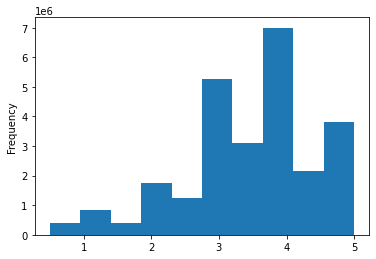

In [65]:
# Analyse rating data
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()